## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

import matplotlib

## The Data

In [3]:
import os
print(os.getenv("Country_path"))
## Please add the Country_path  to your environment variables where CSV files are stored
var = input("Enter the Country: ")
df_Usa = pd.read_csv(os.getenv('Country_path') + '\\' + var + '_history_data.csv')
df_Usa.head()

C:\Users\manudeep\Desktop\Fall_2020\EECS_731\Project\731_Final_Project\Contries_Data
Enter the Country: USa


,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,United States,01/01/1970,35.0,28.1,32.0,20.9,NaN,0.00,NaN,13.9,NaN,12.8,77.9,61.54,Overcast
1,United States,01/02/1970,41.1,25.1,33.2,18.1,NaN,0.00,NaN,17.2,NaN,10.0,37.5,59.52,Partially cloudy
2,United States,01/03/1970,38.0,26.9,33.6,15.5,NaN,0.05,NaN,17.2,NaN,10.5,73.3,67.34,"Rain, Partially cloudy"
3,United States,01/04/1970,33.2,21.8,27.0,10.9,NaN,0.00,NaN,17.2,NaN,9.5,0.0,51.89,Clear
4,United States,01/05/1970,44.0,20.0,30.2,11.1,NaN,0.00,NaN,15.0,NaN,9.3,47.1,65.60,Partially cloudy


### Random Slice of Data
<hr>

In [4]:
df_Usa.sample(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
5941,United States,04/08/1986,73.1,56.0,62.5,NaN,NaN,0.0,NaN,25.3,NaN,10.2,42.2,57.67,Partially cloudy
18435,United States,07/15/2020,89.9,71.6,81.5,NaN,90.3,0.0,NaN,10.9,18.3,9.9,39.5,59.22,Partially cloudy
5378,United States,09/22/1984,80.9,65.0,71.8,NaN,81.1,0.0,NaN,12.8,NaN,12.5,77.9,66.64,Overcast
11577,United States,09/18/2001,79.1,56.9,68.3,NaN,NaN,0.0,NaN,10.3,NaN,9.6,73.8,70.25,Partially cloudy
4552,United States,06/19/1982,84.8,69.2,76.6,NaN,86.2,0.0,NaN,13.6,NaN,5.2,67.1,63.94,Partially cloudy


<b> Feature Description </b><br>
<hr>

`Temperature`: Average Temp (deg F)<br>
`Precipitation`: Water that is falling out of the sky, this could be rain, drizzle, snow, sleet, hail or something rarer. (Inches)<br>
`Wind Chill` - the cooling effect of wind blowing on a surface(Temp a human feels becuase of heat is loss from the exposed skin)	(deg F)<br>
`Heat Index` - The Heat Index is a measure of how hot it really feels when relative humidity is factored in with the actual air temperature. (deg F)<br>
`Snow Depth` -  Determine the depth of the new and old snow remaining on the ground at observation time. (Inches)<br>
`Wind Speed` - Speed of wind in (Miles/hour)<br>
`Wind Gust` -  brief increase in the speed of the wind (Miles/hour) <br>
`Visibility` - visibility is a measure of the distance at which an object or light can be clearly discerned (Miles)<br>
`Cloud Cover` - fraction of the sky obscured by clouds when observed from a particular location ()<br>
`Relative Humidity` - Relative humidity is the ratio of the partial pressure of water vapor to the equilibrium vapor pressure of water at a given temperature<br>
`Condition` - Condition of the whole day.

In [5]:
df_Usa.shape

(18545, 15)

In [6]:
#printing missing data sum
df_Usa.isnull().sum()

Name                       0
Date time                  0
Maximum Temperature        0
Minimum Temperature        0
Temperature                0
Wind Chill              9784
Heat Index             13239
Precipitation              0
Snow Depth             16653
Wind Speed                 0
Wind Gust              16022
Visibility                 0
Cloud Cover                0
Relative Humidity          0
Conditions                 0
dtype: int64

<AxesSubplot:>

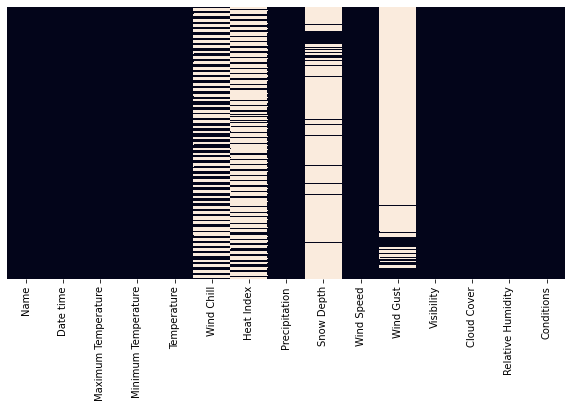

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df_russia.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [10]:
#dropping these columns as there are large no of null values
df_Usa.drop(columns=['Snow Depth','Heat Index','Wind Gust','Wind Chill'],inplace=True)

In [11]:
df_Usa.tail()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions
18540,United States,10/28/2020,69.7,61.6,65.3,0.00,11.9,8.6,42.1,87.16,Partially cloudy
18541,United States,10/29/2020,63.5,52.9,58.3,2.25,16.4,6.4,57.1,91.80,"Rain, Partially cloudy"
18542,United States,10/30/2020,53.8,48.6,50.9,0.31,20.5,9.7,89.3,76.92,"Rain, Overcast"
18543,United States,10/31/2020,49.6,40.5,46.6,0.00,14.3,9.9,86.7,69.44,Overcast
18544,United States,11/01/2020,58.6,41.9,51.5,0.51,26.1,9.3,87.1,73.21,"Rain, Overcast"


For now, We will take Temperature and Precipitation as our Dependent variables for regression

In [12]:
#minimum value for temperature
df_Usa['Temperature'].min()

2.2

In [13]:
#maximum value for temperature
df_Usa['Temperature'].max()

93.4

In [14]:
#minimim value for temperature
df_Usa['Precipitation'].min()

0.0

In [15]:
#maximum value for precipitation
df_Usa['Precipitation'].max()

10.0

In [14]:
#ToDO - Update feature details

In [15]:
#Todo:How Windspeed is Effecting Temperature
#Todo: How Humidity affects Temperature

### 3 Feature Engineering

####  Variance Threshold For Temperature

In [16]:
# Using Variance threshold to select variant features and drop constant features for temperature
X=df_Usa.drop(columns=['Temperature','Name','Date time','Maximum Temperature','Minimum Temperature','Conditions'],axis=1)
Y=df_Usa['Temperature']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [17]:
X.head()

,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,0.00,13.9,12.8,77.9,61.54
1,0.00,17.2,10.0,37.5,59.52
2,0.05,17.2,10.5,73.3,67.34
3,0.00,17.2,9.5,0.0,51.89
4,0.00,15.0,9.3,47.1,65.60


In [18]:
var_thres.get_support()

array([ True,  True,  True,  True,  True])

Variance threshold doesn't give much information as there are no columns with zero variance

####  Variance Threshold For Precipitation

In [20]:
# Using Variance threshold to select variant features and drop constant features for Precipitation
X=df_Usa.drop(columns=['Precipitation','Name','Date time','Conditions'],axis=1)
Y=df_Usa['Precipitation']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [21]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

Same as with Temperature, Variance threshold doesn't give much information for Precipitation as there are no columns with zero variance

### 3.2 Feature Selection using pearson correlation coefficient

Now let's check relevant features for the model on the basis of correlation with dependent variable Temperature and Precipitation

<AxesSubplot:>

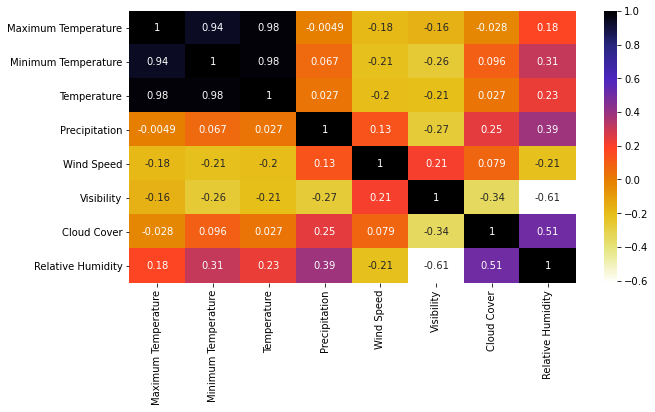

In [22]:
plt.figure(figsize=(10,5))
c= df_Usa.corr()
sns.heatmap(c,cmap='CMRmap_r',annot=True)

Higher the value with the other variable, higher the correlation. Maximum Temperature and Minimum Temperature are highly correalted with Each other and with temperature , but prediction would be obvious in that case, 

Also, for `Temperature` which is one of our dependent varaiable, Temperature is slightly correlated with Relative Humidity and has a slight negative correlation with Visibility and windspeed. Almost negligible correlation with Cloud cover and Precipitation

For `Precipitation`, It is well correlated with Relative humidity, Cloud cover. Negatively correlated with Visibility and maximum temperature

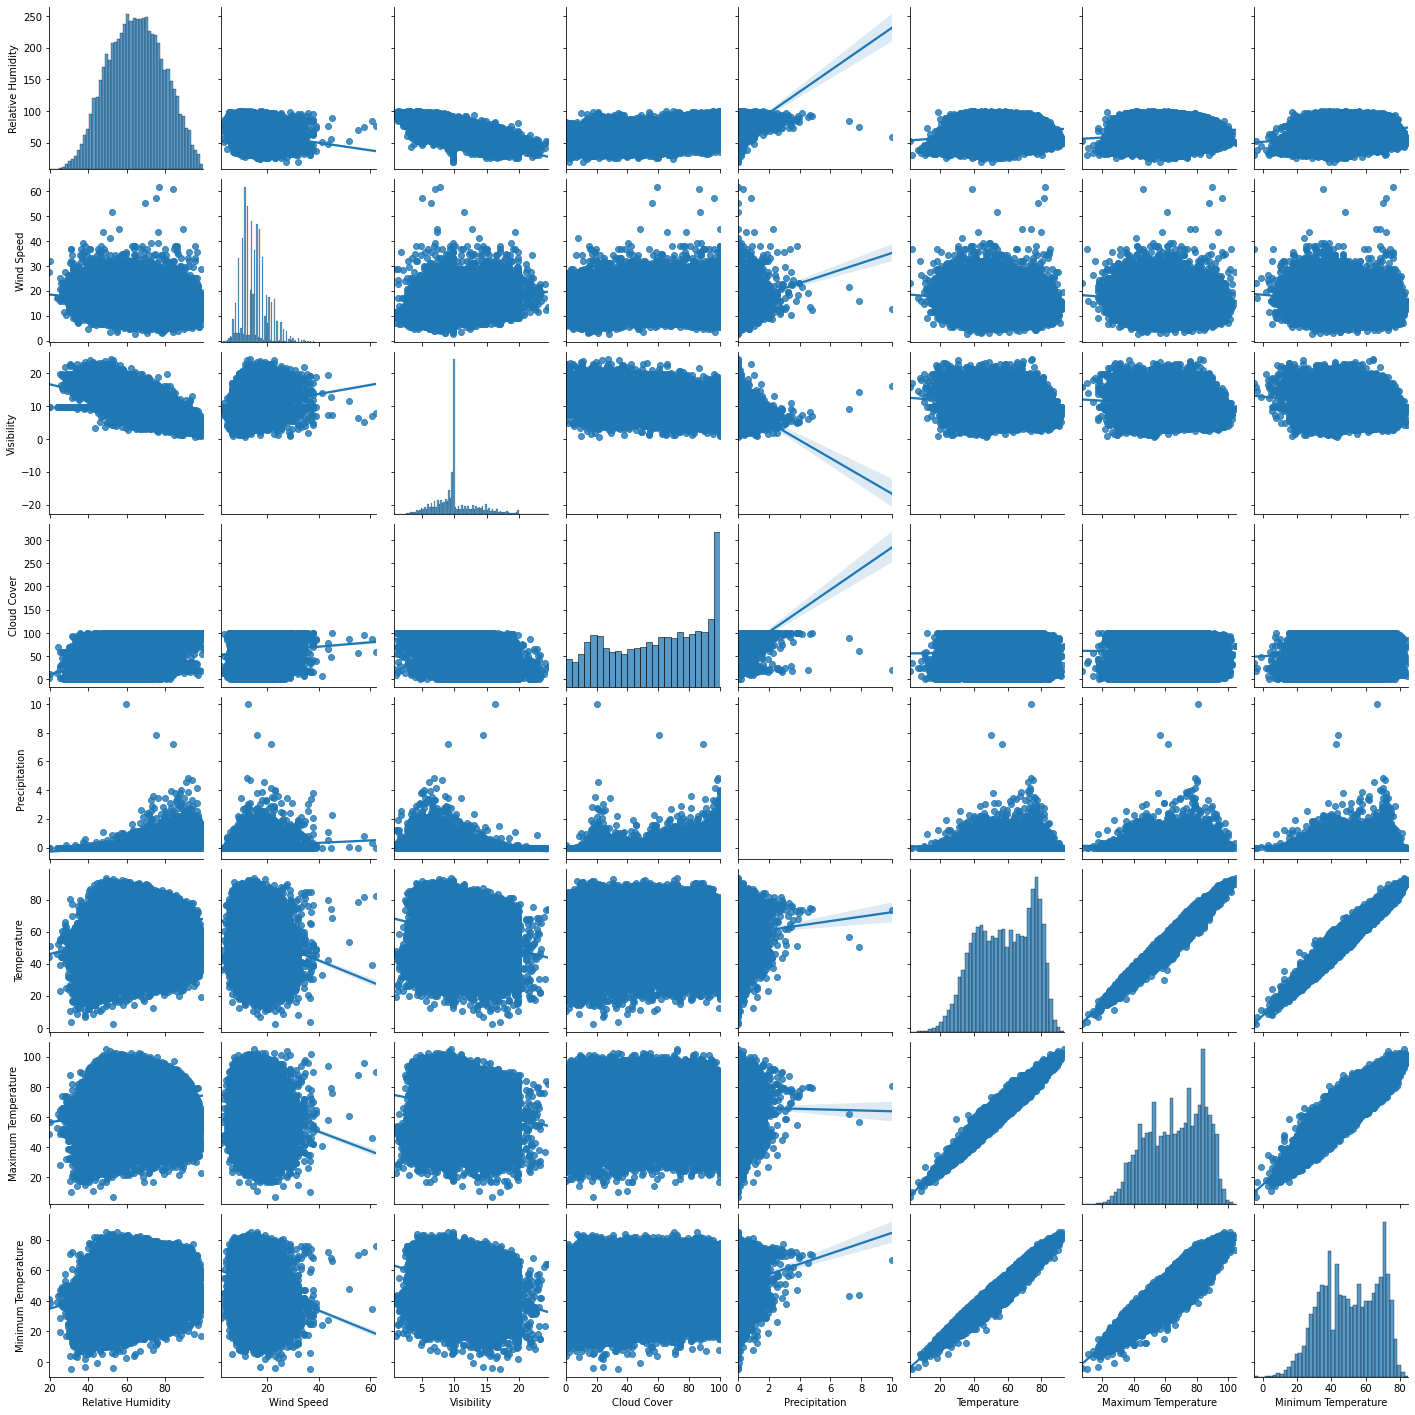

In [23]:
#Taking Temperature,Precipitation as traget and plotting a pairplot of type regression
sns.pairplot(data=df_Usa[['Relative Humidity','Wind Speed','Visibility','Cloud Cover','Precipitation','Temperature','Maximum Temperature',
                         'Minimum Temperature']],kind='reg')

For Temperature, We can see Maximum Temperature, Minimum Temperature and Temperature have a linear relationship, with respect to other features , we can see there is no linear relation with any other feature

For Precipitation, We can see no linear relationship with any other features, majority of values for precipitation lie between 0 and 2

#### 3.3 Using Feature Transformation for conditions

In [24]:
df_Usa['Conditions'] = df_Usa['Conditions'].astype('category')

In [25]:
df_Usa_conditions = pd.get_dummies(df_russia['Conditions'])

In [26]:
df_Usa  = pd.concat([df_Usa,df_Usa_conditions],axis=1)

In [27]:
df_Usa.head()

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Precipitation,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Conditions,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
0,United States,01/01/1970,35.0,28.1,32.0,0.00,13.9,12.8,77.9,61.54,Overcast,0,1,0,0,0,0,0,0,0
1,United States,01/02/1970,41.1,25.1,33.2,0.00,17.2,10.0,37.5,59.52,Partially cloudy,0,0,1,0,0,0,0,0,0
2,United States,01/03/1970,38.0,26.9,33.6,0.05,17.2,10.5,73.3,67.34,"Rain, Partially cloudy",0,0,0,0,0,1,0,0,0
3,United States,01/04/1970,33.2,21.8,27.0,0.00,17.2,9.5,0.0,51.89,Clear,1,0,0,0,0,0,0,0,0
4,United States,01/05/1970,44.0,20.0,30.2,0.00,15.0,9.3,47.1,65.60,Partially cloudy,0,0,1,0,0,0,0,0,0


## Regression

(array([  10.,  118.,  630., 1942., 3039., 2823., 2768., 3176., 3595.,
         444.]),
 array([ 2.2 , 11.32, 20.44, 29.56, 38.68, 47.8 , 56.92, 66.04, 75.16,
        84.28, 93.4 ]),
 <BarContainer object of 10 artists>)

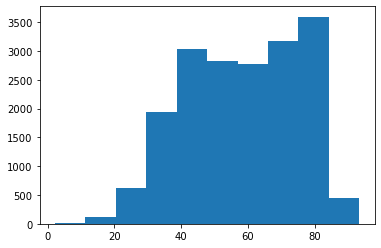

In [28]:
plt.hist(df_Usa['Temperature'])

(array([1.8045e+04, 4.1700e+02, 5.6000e+01, 2.0000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

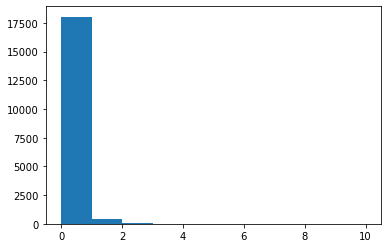

In [29]:
plt.hist(df_Usa['Precipitation'])

#### Segregating variables: Independent and Dependent Variables for Temperature

In [30]:
X_temp=df_Usa.drop(columns=['Maximum Temperature','Minimum Temperature','Temperature','Precipitation',
                            'Conditions','Name','Date time'],axis=1)
Y_temp=df_Usa.Temperature

#### Importing the train test split function for Temperature

In [31]:
from sklearn.model_selection import train_test_split
train_X_temp,test_X_temp,train_y_temp,test_y_temp = train_test_split(X_temp,Y_temp)

In [32]:
train_X_temp.head()

,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",Snow,"Snow, Overcast","Snow, Partially cloudy"
8675,16.1,14.5,32.5,68.92,0,0,0,0,0,1,0,0,0
11835,13.9,9.9,62.9,39.81,0,0,1,0,0,0,0,0,0
14680,7.4,9.9,16.3,53.93,1,0,0,0,0,0,0,0,0
6895,21.9,11.5,54.8,57.27,0,0,0,0,0,1,0,0,0
7008,15.0,11.7,0.0,53.86,1,0,0,0,0,0,0,0,0


In [35]:
train_y_temp.head()

8675     62.3
11835    71.5
14680    66.0
6895     55.1
7008     37.5
Name: Temperature, dtype: float64

In [36]:
#getting the shape for training data
train_X_temp.shape

(13908, 13)

In [37]:
train_y_temp.shape

(13908,)

In [38]:
#getting the shape for test data
test_X_temp.shape

(4637, 13)

### 1. Implementing Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score 
import math

In [40]:
lr = LR(normalize=True)
lr.fit(train_X_temp,train_y_temp)
y_pred_1=lr.predict(test_X_temp)

In [41]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_X_temp)
k = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(k) )

Training Root Mean Squared Error 15.05300680943996


In [42]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
k = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(k))

Test Root Mean Squared Error 15.204076426352223


### Ridge Regression

In [43]:
from sklearn import linear_model
model=linear_model.Ridge()
model.fit(train_X_temp,train_y_temp)
y_predict=model.predict(test_X_temp)

In [44]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(train_X_temp)
ridge_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(ridge_train_error) )

Training Root Mean Squared Error 15.053026856726568


In [45]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_X_temp)
ridge_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(ridge_test_error) )
ridge_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Ridge regression',ridge_r2_score)

Test Root Mean Squared Error 15.204076426352223
R2 Square Error for Ridge regression 0.18549268175360478


### Residual Plot in Ridge Regression

Text(0.5, 1.0, 'Residual plot in Ridge Regression')

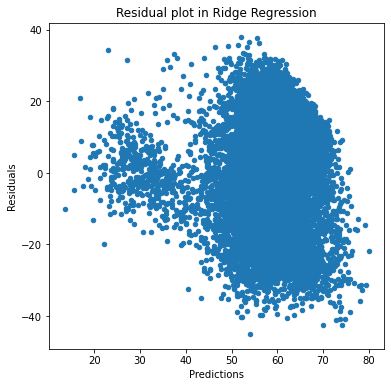

In [46]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Ridge Regression")

### Knn Algorithm

In [47]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_temp[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

In [48]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_temp,train_y_temp)
y1_knn=knn.predict(test_X_temp)

In [49]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_temp)
knn_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 12.274311058643457


In [50]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_temp)
knn_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )
knn_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for KNN regression',knn_r2_score)

Test Root Mean Squared Error 15.182352995644807
R2 Square Error for KNN regression 0.18781853863104414


### Residual plot in KNN

Text(0.5, 1.0, 'Residual plot in KNN Regression')

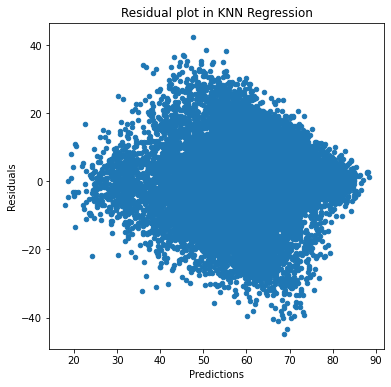

In [51]:
preds = pd.DataFrame({"preds":knn.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in KNN Regression")

### Gradient Boosting Regressor

In [52]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_X_temp,train_y_temp)

[20:23:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [53]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_temp)
xgb_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 13.672725580939144


In [54]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_temp)
xgb_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )
xgb_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Gradient Boosting regression',xgb_r2_score)

Test Root Mean Squared Error 14.068535682049735
R2 Square Error for Gradient Boosting regression 0.302614849640512


### Decision Tree Regressor

In [55]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_temp,train_y_temp)

DecisionTreeRegressor(max_depth=1)

In [56]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_temp)
dec_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 16.063364947230436


In [57]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_temp)
dec_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error) )
dc_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for Decision Tree regression',dc_r2_score)

Test Root Mean Squared Error 16.244379491455152
R2 Square Error for Decision Tree regression 0.070217953322113


### Residual Plot in Decision Tree Regressor

Text(0.5, 1.0, 'Residual plot in Decision Tree Regression')

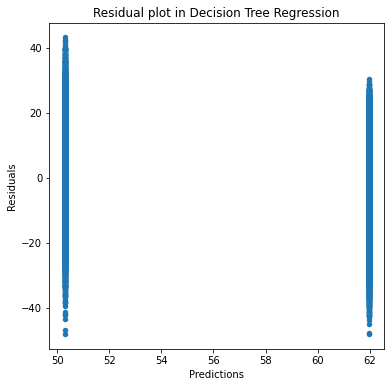

In [58]:
preds = pd.DataFrame({"preds":dec.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Decision Tree Regression")

### 3. Support Vector Regression for Temperature

#### Pre processing features

In [59]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(train_X_temp,train_y_temp)
pred1=model1.predict(test_X_temp)

In [60]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_temp)
svm_train_error = mse(train_predict, train_y_temp)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 15.165723066962448


In [61]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_temp)
svm_test_error = mse(test_y_temp, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error) )
svm_r2_score = r2_score(test_y_temp,test_predict)
print('R2 Square Error for SVM regression',svm_r2_score)

Test Root Mean Squared Error 15.37720715416774
R2 Square Error for SVM regression 0.1668372730740525


### Residual Plot for Support Vector Machine

Text(0.5, 1.0, 'Residual plot in Support Vector Regression')

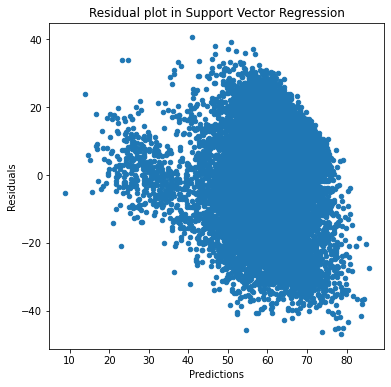

In [62]:
preds = pd.DataFrame({"preds":model1.predict(train_X_temp), "true":train_y_temp})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title("Residual plot in Support Vector Regression")

### Getting the Graph for all Models RMSE

In [63]:
train_error=[ridge_train_error,knn_train_error,xgb_train_error,dec_train_error,svm_train_error]
test_error=[ridge_test_error,knn_test_error,xgb_test_error,dec_test_error,svm_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','Gradient Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Ridge Regression,15.053027,15.204076
K-Nearest,12.274311,15.182353
Gradient Boost,13.672726,14.068536
Decision Tree,16.063365,16.244379
SVM,15.165723,15.377207


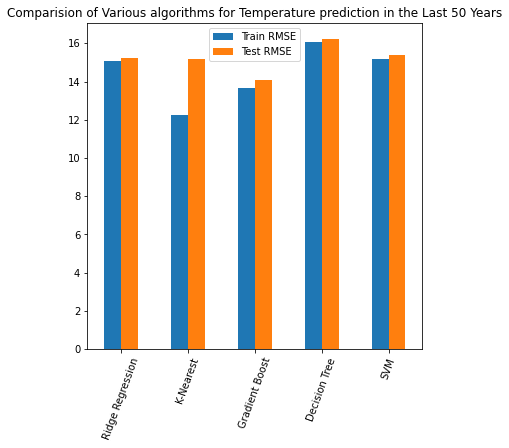

In [64]:
df.plot(kind='bar')
plt.xticks(rotation=70)
plt.title("Comparision of Various algorithms for Temperature prediction in the Last 50 Years")
plt.show()

### Getting the Graph for all Models Test R2 Square Error

In [65]:
test_r2_square_error=[ridge_r2_score,knn_r2_score,xgb_r2_score,dc_r2_score,svm_r2_score]

col={'Test R2 Square Error':[i for i in test_r2_square_error]}
models=['Ridge Regression','K-Nearest','Gradent Boost','Decision Tree','SVM']
df=pd.DataFrame(data=col,index=models)
df

,Test R2 Square Error
Ridge Regression,0.185493
K-Nearest,0.187819
Gradent Boost,0.302615
Decision Tree,0.070218
SVM,0.166837


Text(0.5, 1.0, 'R2 Square for Various Models')

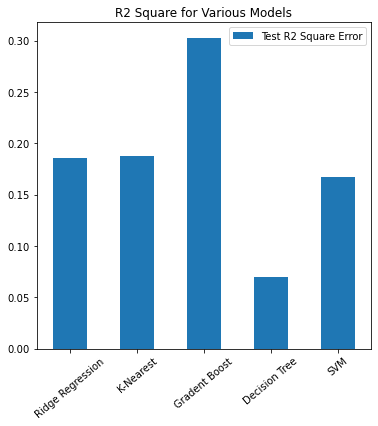

In [66]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("R2 Square for Various Models")

#### Segregating variables: Independent and Dependent Variables for Precipitation

In [67]:
X_prec=df_russia.drop(columns=['Precipitation','Conditions','Name','Date time'],axis=1)
Y_prec=df_russia.Precipitation

In [68]:
X_prec.head()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Speed,Visibility,Cloud Cover,Relative Humidity
0,35.0,28.1,32.0,13.9,12.8,77.9,61.54
1,41.1,25.1,33.2,17.2,10.0,37.5,59.52
2,38.0,26.9,33.6,17.2,10.5,73.3,67.34
3,33.2,21.8,27.0,17.2,9.5,0.0,51.89
4,44.0,20.0,30.2,15.0,9.3,47.1,65.60


#### Importing the train test split function for Precipitation

In [69]:
from sklearn.model_selection import train_test_split
train_X_prec,test_X_prec,train_y_prec,test_y_prec = train_test_split(X_prec,Y_prec)

### Ridge Regression

In [70]:
from sklearn import linear_model
model=linear_model.Ridge()
model.fit(train_X_prec,train_y_prec)
y_predict=model.predict(test_X_prec)

In [71]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(train_X_prec)
ridge_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(ridge_train_error) )

Training Root Mean Squared Error 0.2737915146922822


In [72]:
# Predicting over the Test Set and calculating error
test_predict = model.predict(test_X_prec)
ridge_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(ridge_test_error) )

Test Root Mean Squared Error 0.3480000915445368


### Knn Algorithm

In [73]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']] = x_scaled.fit_transform(train_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

x_test_scaled= StandardScaler()
test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']]=x_test_scaled.fit_transform(test_X_prec[['Wind Speed','Visibility','Cloud Cover','Relative Humidity']])

In [74]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_X_prec,train_y_prec)
y1_knn=knn.predict(test_X_prec)

In [75]:
# Predicting over the Train Set and calculating error
train_predict = knn.predict(train_X_prec)
knn_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(knn_train_error) )

Training Root Mean Squared Error 0.22746156571365056


In [76]:
# Predicting over the Test Set and calculating error
test_predict = knn.predict(test_X_prec)
knn_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(knn_test_error) )

Test Root Mean Squared Error 0.356351949760822


### Decision Tree Regressor

In [77]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(train_X_prec,train_y_prec)

DecisionTreeRegressor(max_depth=1)

In [78]:
# Predicting over the Train Set and calculating error
train_predict = dec.predict(train_X_prec)
dec_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(dec_train_error) )

Training Root Mean Squared Error 0.28292805598730264


In [79]:
# Predicting over the Test Set and calculating error
test_predict = dec.predict(test_X_prec)
dec_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(dec_test_error))

Test Root Mean Squared Error 0.3574626155259194


### Gradient Boosting Regressor

In [80]:
xgb = XGBRegressor()
xgb.fit(train_X_prec,train_y_prec)

[20:25:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [81]:
# Predicting over the Train Set and calculating error
train_predict = xgb.predict(train_X_prec)
xgb_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(xgb_train_error) )

Training Root Mean Squared Error 0.2348408143486735


In [82]:
# Predicting over the Test Set and calculating error
test_predict = xgb.predict(test_X_prec)
xgb_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(xgb_test_error) )

Test Root Mean Squared Error 0.33229077766181747


###  Support Vector Regression for Precipitation

In [83]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(train_X_prec,train_y_prec)
pred1=model1.predict(test_X_prec)

In [84]:
# Predicting over the Train Set and calculating error
train_predict = model1.predict(train_X_prec)
svm_train_error = mse(train_predict, train_y_prec)
print('Training Root Mean Squared Error', math.sqrt(svm_train_error) )

Training Root Mean Squared Error 0.28664960567663483


In [85]:
# Predicting over the Test Set and calculating error
test_predict = model1.predict(test_X_prec)
svm_test_error = mse(test_y_prec, test_predict)
print('Test Root Mean Squared Error', math.sqrt(svm_test_error))

Test Root Mean Squared Error 0.3601676805724653


### Getting the Graph for all Models RMSE

In [86]:
train_error=[ridge_train_error,knn_train_error,dec_train_error,svm_train_error,xgb_train_error]
test_error=[ridge_test_error,knn_test_error,dec_test_error,svm_test_error,xgb_test_error]

col={'Train RMSE':[math.sqrt(i) for i in train_error],
         'Test RMSE':[math.sqrt(i) for i in test_error]}
models=['Ridge Regression','K-Nearest','Decision Tree','SVM','Gradient Boost']
df=pd.DataFrame(data=col,index=models)
df

,Train RMSE,Test RMSE
Ridge Regression,0.273792,0.348000
K-Nearest,0.227462,0.356352
Decision Tree,0.282928,0.357463
SVM,0.286650,0.360168
Gradient Boost,0.234841,0.332291


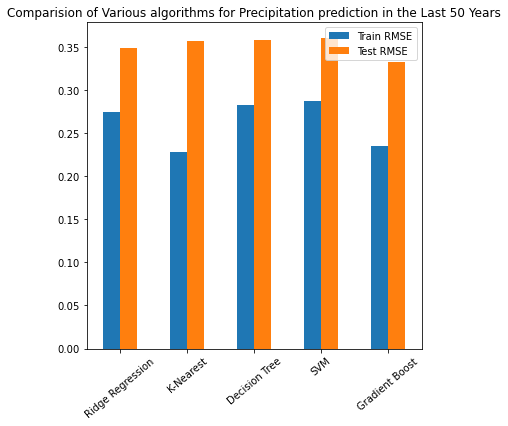

In [87]:
df.plot(kind='bar')
plt.xticks(rotation=40)
plt.title("Comparision of Various algorithms for Precipitation prediction in the Last 50 Years")
plt.show()